<a href="https://colab.research.google.com/github/KimRass/Programming/blob/master/Data%20Science/Machine%20Learning/Time%20Series/NYC%20Taxi%20%26%20TadGAN%20(Anomaly%20Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Science/Machine Learning/Time Series/NYC Taxi & TadGAN (Anomaly Detection).ipynb
!pip uninstall -y keras-nightly tensorflow
!pip install orion-ml "urllib3>=1.25.4, <1.26"

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0
     |████████████████████████████████| 110 kB 6.6 MB/s 
     |████████████████████████████████| 127 kB 48.9 MB/s 
     |████████████████████████████████| 107 kB 61.6 MB/s 
     |████████████████████████████████| 180 kB 47.3 MB/s 
     |████████████████████████████████| 508 kB 39.3 MB/s 
     |████████████████████████████████| 5.4 MB 33.8 MB/s 
     |████████████████████████████████| 10.1 MB 47.2 MB/s 
     |████████████████████████████████| 2.9 MB 35.7 MB/s 
     |████████████████████████████████| 17.3 MB 39.0 MB/s 
     |████████████████████████████████| 377 kB 56.7 MB/s 
     |████████████████████████████████| 149 kB 64.3 MB/s 
     |████████████████████████████████| 2.5 MB 61.4 MB/s 
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 240 kB 65.8 MB/s 
     |██████

- Restart runtime

In [2]:
!pip freeze | grep orion-ml

SyntaxError: ignored

In [3]:
%%bash
rm -rf Orion
rm -rf images

git clone https://github.com/signals-dev/Orion.git
mv Orion/tutorials/tulog/* .
exit

Cloning into 'Orion'...


In [4]:
# https://analyticsindiamag.com/hands-on-guide-to-tadgan-with-python-codes/ 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from orion import Orion
from orion.data import load_signal, load_anomalies
from orion.primitives.tadgan import TadGAN, score_anomalies
from orion.primitives.timeseries_anomalies import find_anomalies
from utils import plot, plot_ts, plot_rws, plot_error, unroll_ts
from model import hyperparameters

plt.style.use("dark_background")

Using TensorFlow backend.


In [5]:
signal = "nyc_taxi"
raw_data = load_signal(signal)
known_anoms = load_anomalies(signal)

In [6]:
known_anoms

,start,end
0,1414679400,1415050200
1,1416913200,1417284000
2,1419330600,1419701400
3,1419885000,1420255800
4,1422127800,1422498600


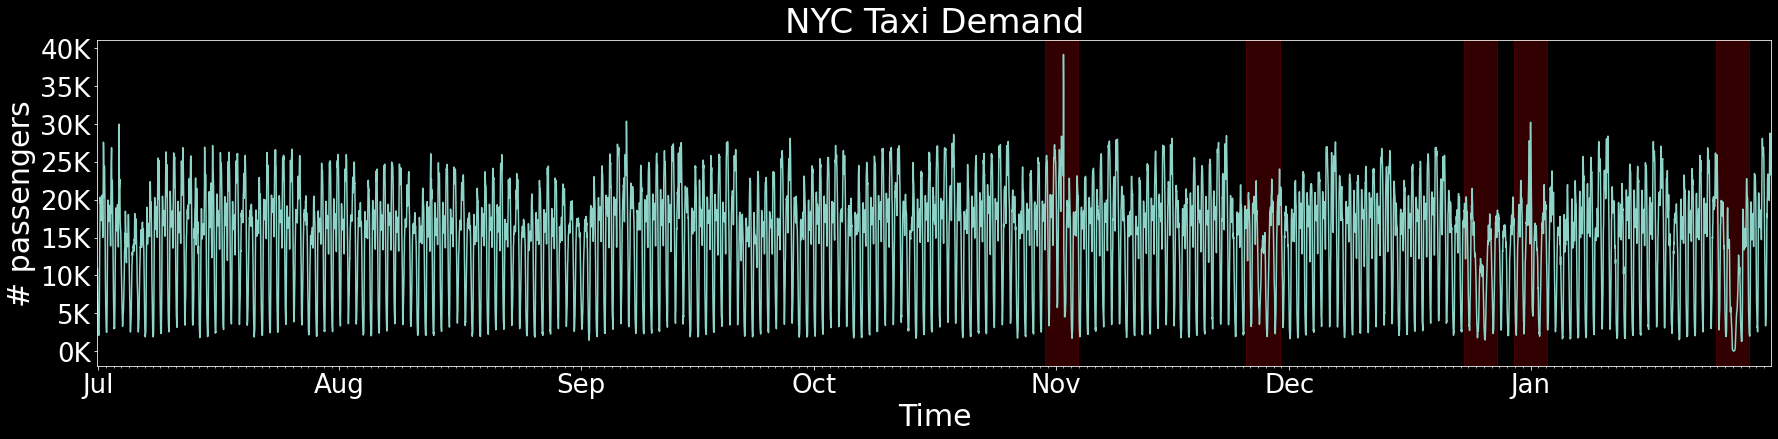

In [7]:
# This function plots time series and highlights anomalous regions.
# The first anomaly in `anomalies` is considered the ground truth.
plot(raw_data, anomalies=known_anoms);

# Modeling Using Orion Pipelines

In [8]:
# The model is specified in `tadgan.json`.
# orion = Orion(pipeline="/content/drive/MyDrive/Time Series/tadgan.json")
# `pipeline`: (`"arima"`, `"lstm_dynamic_threshold"`, `"dummy"`, `"tadgan"`, `"azure"`)
# `hyperparameters`
orion = Orion(pipeline="tadgan.json")
# To train the model on the data, we simply use the `orion.fit()` method.
# To do anomaly detection, we use the `orion.detect()` method.
# In our case, we want to fit the data and then perform detection; therefore we use the `orion.fit_detect()` method.
detected_anoms = orion.fit_detect(raw_data)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch: 1/5, [Dx loss: [-0.646762  -3.1055942  1.6354494  0.0823383]] [Dz loss: [-3.8407903   0.07790624 -5.3392243   0.14205284]] [G loss: [12.014019   -1.631108   12.028902    0.16162275]]
Epoch: 2/5, [Dx loss: [-1.0456737  -7.3463483   6.1051273   0.01955481]] [Dz loss: [-27.111366     0.4706674  -29.285528     0.17034972]] [G loss: [42.584927   -6.1078606  47.245224    0.14475629]]
Epoch: 3/5, [Dx loss: [-1.0786835  -6.2181087   4.954063    0.01853602]] [Dz loss: [-185.53453       1.9401889  -193.2342        0.57594794]] [G loss: [ 2.2022809e+02 -4.9448757e+00  2.2386697e+02  1.3060240e-01]]
Epoch: 4/5, [Dx loss: [ -0.82843137 -12.224904    11.214054     0.01824187]] [Dz loss: [-102.96252      2.6197968 -123.32362      1.774131 ]] [G loss: [ 1.27047325e+02 -1.09601002e+01  1.36660919e+02  1.34652957e-01]]
Epoch: 5/5, [Dx loss: [ -0.6490625  -12.8261175   12.037741     0.01393156]] [Dz loss: [ 3.0389218  3.1086268 -7.9810987  0.7911397]] [G loss: [ -2.4404993  -12.301543     8.430019

In [9]:
detected_anoms

,start,end,severity
0,1404165600,1404275400,0.105791
1,1409790600,1410064200,0.153883
2,1422104400,1422507600,0.571551


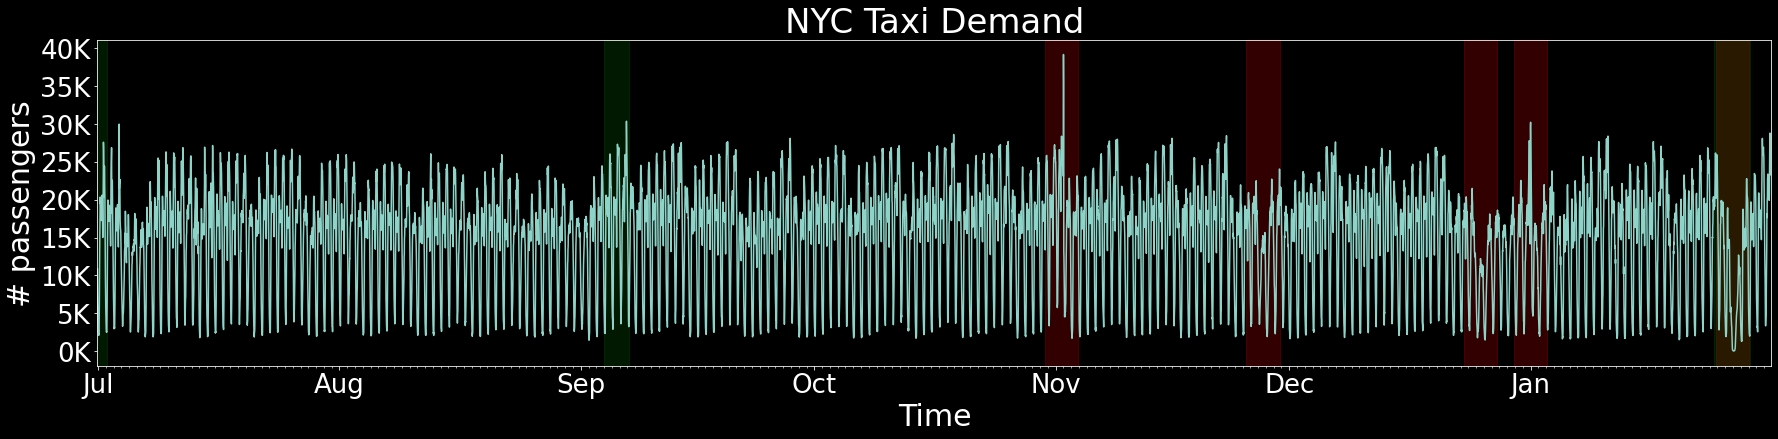

In [10]:
plot(raw_data, anomalies=[known_anoms, detected_anoms])

In [20]:
scores = orion.evaluate(raw_data, known_anoms)

In [21]:
scores

accuracy     0.897781
f1           0.280845
recall       0.200000
precision    0.471395
dtype: float64

# Modeling Using `orion.primitives`

In [11]:
# `interval`: An interger that refers to the time span to compute aggregation of.
# `time_column`: Column of `X` that contains time values.
# `method`: What aggregation method should be used to compute the value, by default this set to the mean.
def time_segments_aggregate(X, interval, time_column, method=["mean"]):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
    X = X.sort_values(time_column).set_index(time_column)

    if isinstance(method, str):
        method = [method]

    start_ts = X.index.values[0]
    max_ts = X.index.values[-1]
    values = list()
    index = list()
    while start_ts <= max_ts:
        end_ts = start_ts + interval
        subset = X.loc[start_ts:end_ts - 1]
        aggregated = [getattr(subset, agg)(skipna=True).values for agg in method]
        values.append(np.concatenate(aggregated))
        index.append(start_ts)
        start_ts = end_ts
    return np.asarray(values), np.asarray(index)

# 30 minutes == 1800 seconds.
data, index = time_segments_aggregate(raw_data, interval=1800, time_column="timestamp")

In [12]:
# Data Imputation
imp = SimpleImputer()
data = imp.fit_transform(data)

# Feature Scaling
sc = MinMaxScaler(feature_range=(-1, 1))
data = sc.fit_transform(data)

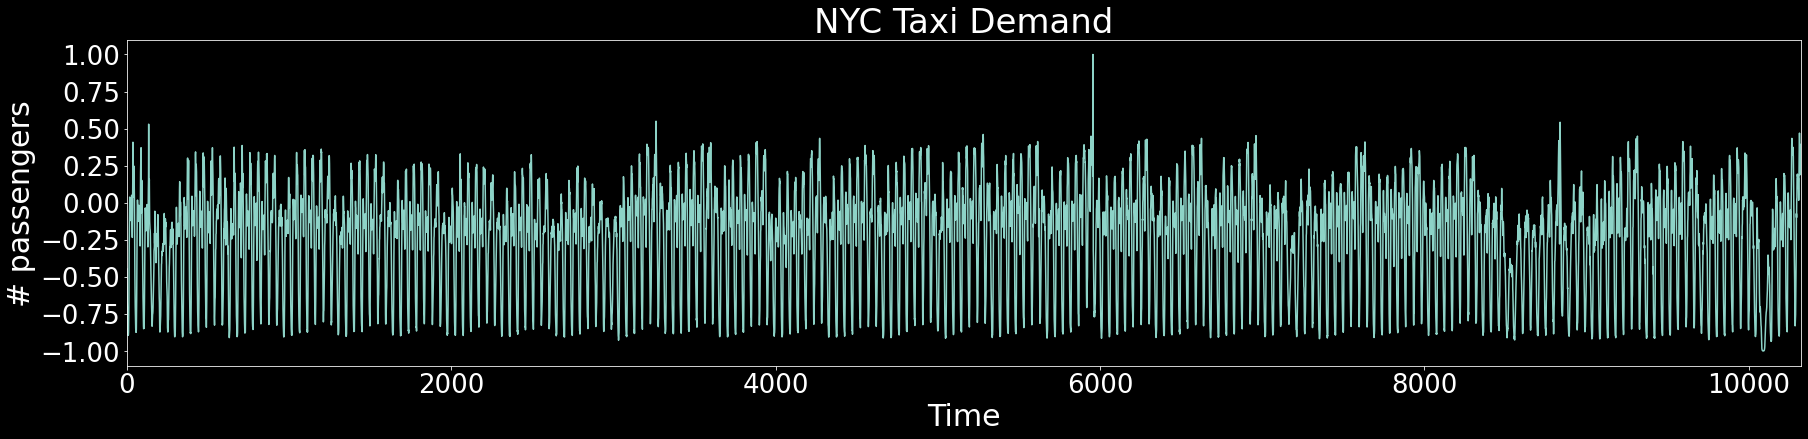

In [13]:
# `label`: Label for the legend.
plot_ts(data)

In [14]:
# Blocked CV
def rolling_window_sequences(X, index, window_size, target_size, step_size, target_column, drop=None, drop_windows=False):
    out_X = list()
    out_y = list()
    X_index = list()
    y_index = list()
    target = X[:, target_column]

    if drop_windows:
        if hasattr(drop, '__len__') and (not isinstance(drop, str)):
            if len(drop) != len(X):
                raise Exception('Arrays `drop` and `X` must be of the same length.')
        else:
            if isinstance(drop, float) and np.isnan(drop):
                drop = np.isnan(X)
            else:
                drop = X == drop

    start = 0
    max_start = len(X) - window_size - target_size + 1
    while start < max_start:
        end = start + window_size

        if drop_windows:
            drop_window = drop[start:end + target_size]
            to_drop = np.where(drop_window)[0]
            if to_drop.size:
                start += to_drop[-1] + 1
                continue

        out_X.append(X[start:end])
        out_y.append(target[end:end + target_size])
        X_index.append(index[start])
        y_index.append(index[end])
        start = start + step_size

    return np.asarray(out_X), np.asarray(out_y), np.asarray(X_index), np.asarray(y_index)

X, y, X_index, y_index = rolling_window_sequences(data, index, window_size=100, target_size=1, step_size=1, target_column=0)

# Modeling
- The architecture of the model requires four neural networks:
    - `encoder`: maps `X` to its latent representation `Z`.
    - `generator`: maps the latent variable `Z` back to `X`, which we will denote later on as `X_hat`.
    - `criticX`: discriminates between `X` and `generator(Z)` or `X_hat`.
    - `criticZ`: discriminates between `Z` and `encoder(X)`.
- 
To use the `TadGAN` model, we specify a number of parameters including the model layers (structure of the previously mentioned neural networks). We also specify the input dimensions, the number of epochs, the learning rate, etc. All the parameters are listed below.

In [22]:
hyperparameters["epochs"] = 10
hyperparameters["shape"] = (X.shape[1], X.shape[2])
hyperparameters["optimizer"] = "keras.optimizers.Adam"
hyperparameters["learning_rate"] = 0.0005
hyperparameters["latent_dim"] = 20
hyperparameters["batch_size"] = 64

# display(hyperparameters)

In [16]:
tgan = TadGAN(**hyperparameters)
tgan.fit(X=X, y=X)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected

Epoch: 1/10, [Dx loss: [-0.7485342  -3.9831107   2.6477342   0.05868409]] [Dz loss: [-0.8944772  -0.8969015  -1.3186125   0.13210367]] [G loss: [ 1.3345668  -2.6702247   2.360734    0.16440566]]
Epoch: 2/10, [Dx loss: [-0.7579415  -6.923209    6.0134788   0.01517882]] [Dz loss: [-3.0767534  -1.6261082  -2.748473    0.12978287]] [G loss: [-1.3311979 -5.900397   3.4926093  0.107659 ]]
Epoch: 3/10, [Dx loss: [-0.5577654  -6.241268    5.539395    0.01441089]] [Dz loss: [-1.3880368  -0.9035507  -0.9526697   0.04681832]] [G loss: [-3.3292542  -5.529346    1.3708493   0.08292434]]
Epoch: 4/10, [Dx loss: [ -0.4479479  -12.251167    11.6773205    0.01259037]] [Dz loss: [-1.2584835   0.0720567  -1.8736497   0.05431091]] [G loss: [ -8.600032   -11.631535     2.387557     0.06439442]]
Epoch: 5/10, [Dx loss: [-3.6761525e-01 -1.1907857e+01  1.1433971e+01  1.0627333e-02]] [Dz loss: [-1.6274027  1.0276073 -3.4611459  0.0806136]] [G loss: [ -5.7972226  -11.453533     4.80258      0.08537309]]
Epoch: 6/

<img src="https://raw.githubusercontent.com/sintel-dev/Orion/e48569fc7796f569615e069d95114bdd2d37623f/tutorials/tulog/images/reconstruct.png" alt="`unroll_ts()`"/>

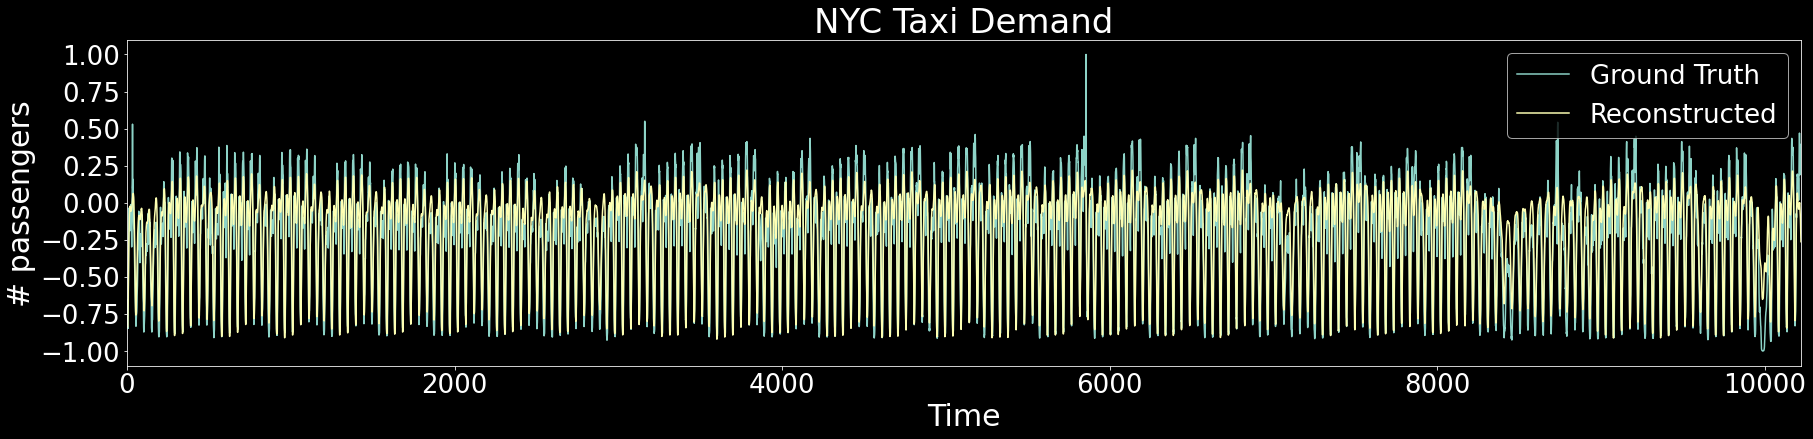

In [30]:
# Reconstruct
# `X_hat`: Predicted values. Same shape as `X`.
# `critic`: N-dimensional array containing the critic score for each input sequence.
X_hat, critic = tgan.predict(X=X, y=X)
# To reassemble or "unroll" the predicted signal `X_hat` we can choose different aggregation methods (e.g., mean, max, etc).
# `utils.unroll_ts()` uses the median value.
y_hat = unroll_ts(X_hat)

plot_ts([y, y_hat], labels=["Ground Truth", "Reconstructed"])

In [42]:
# error = np.zeros(shape=y.shape)
# length = y.shape[0]
# for i in range(length):
#     error[i] = abs(y_hat[i] - y[i])

# fig = plt.figure(figsize=(30, 3))
# plt.plot(error);

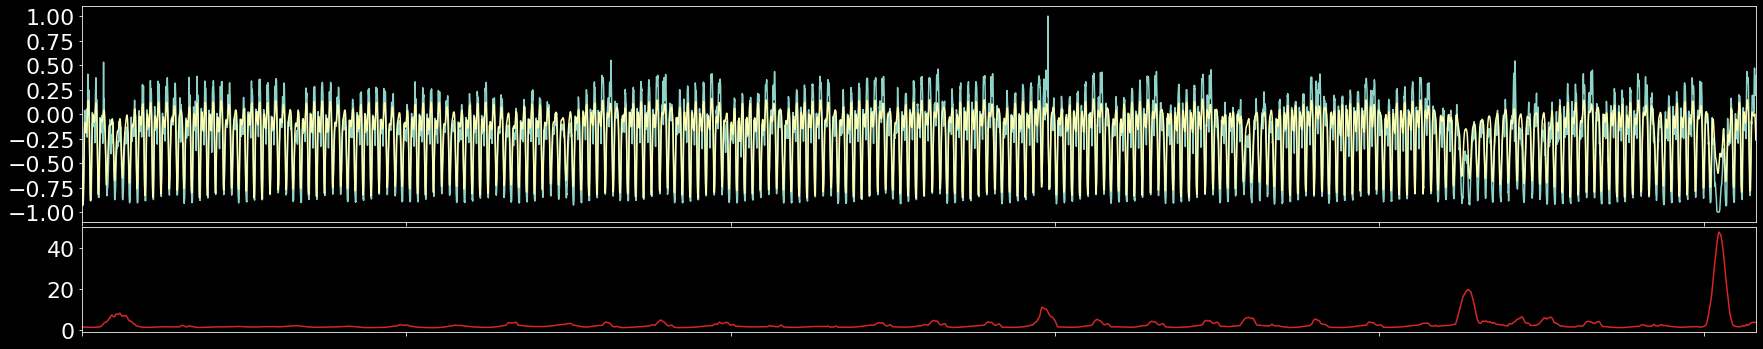

In [138]:
# Error Computation
# We use `tadgan.score_anomalies` to perform error calculation for us. It is a smoothed error function that uses a window based method to smooth the curve.
# `y_hat`: Each timestamp has multiple predictions.
# `index`: Time index for each `y` (start position of the window)
# `rec_error_type`: (`"point"`, `"area"`, `"dtw"`) The method to compute reconstruction error.
    # `"area"`: This method captures the general shape of the orignal and reconstructed signal and then compares them together.
    # `"point"`: This method applies a point-to-point comparison between the original and reconstructed signal. It is considered a strict approach that does not allow for many mistakes.
    # `"dtw"`: A more lenient method yet very effective is Dynamic Time Warping (DTW). It compares two signals together using any pair-wise distance measure but it allows for one signal to be lagging behind another.
# `comb`: (`"mult"`, `"sum"`, `"rec"`) How to combine critic and reconstruction error.
# `errors`: Array of anomaly scores. The higher the anomaly score, the more likely it is an anomaly.
# `y_true`: Ground truth without last `h` timesteps.
errors, _, y_true, y_pred = score_anomalies(y=X, y_hat=X_hat, critic=critic, index=X_index, rec_error_type="dtw", comb="mult")
y_pred = np.array(y_pred).mean(axis=2)

plot_error([[y_true, y_pred], errors])

# Detect Anomalies

## Implementation

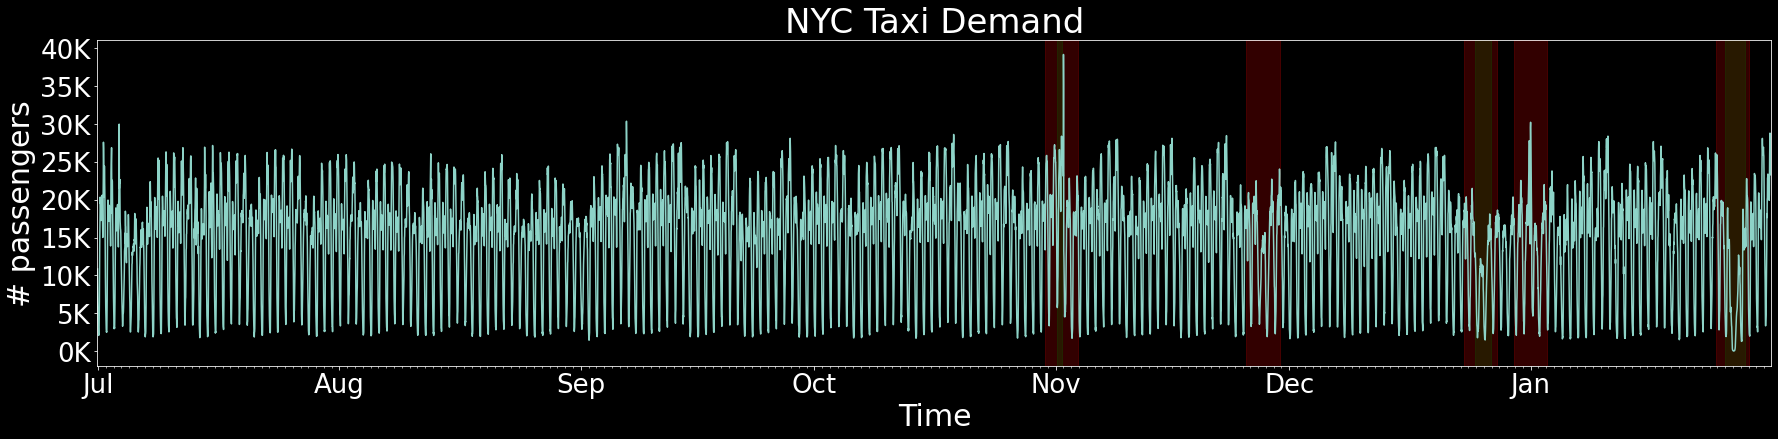

In [162]:
def detect_anoms(errors, index, threshold):
    thr = threshold
    detected_anoms = list()
    i = 0
    max_start = len(errors)
    while i < max_start:
        j = i
        start = index[i]
        while errors[i] > thr:
            i += 1
        end = index[i]
        if start != end:
            detected_anoms.append((start, end, np.mean(errors[j: i+1])))
        i += 1
    return detected_anoms

detected_anoms = detect_anoms(errors=errors, index=index, threshold=10)
detected_anoms = pd.DataFrame(detected_anoms, columns=["start", "end", "score"])

plot(raw_data, anomalies=[known_anoms, detected_anoms])

## Window-based Method

In [ ]:
# We find the anomalous sequences in the window by looking at the mean and standard deviation of the errors in the window.
# We store the start/stop index pairs that correspond to each sequence, along with its score. 
# We then move the window and repeat the procedure. Lastly, we combine overlapping or consecutive sequences.
# `window_size`: Size of the window for which a threshold is calculated.
# `window_step_size`: Number of steps the window is moved before another threshold is calculated for the new window
# `fixes_threshold`: Indicates whether to use fixed or dynamic thresholding
detected_anoms = find_anomalies(errors=errors, index=index, window_size_portion=0.33, window_step_size_portion=0.1, fixed_threshold=True)
detected_anoms = pd.DataFrame(detected_anoms, columns=["start", "end", "score"])

plot(raw_data, anomalies=[known_anoms, detected_anoms])

array([[1.40441940e+09, 1.40461560e+09, 4.18395064e-02],
       [1.40985900e+09, 1.41008400e+09, 1.41144854e-01],
       [1.41045120e+09, 1.41072120e+09, 2.67147421e-01],
       [1.41471360e+09, 1.41495660e+09, 5.13926798e-01],
       [1.42220700e+09, 1.42250040e+09, 1.27265042e+00]])